# Linear Regression for one Feature using Gradient Descent

In [25]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 20 20:31:10 2017

@author: aafaque
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## This function coputes Cost $J(\theta)$

In [26]:
def computecost(X,y,theta):
    m = len(y)
    J = 0
    
    predictions = np.dot(X,theta)
    sqrErrors = np.power((predictions-y),2)
    
    J = (1/(2*m)) * np.sum(sqrErrors)
    return J

## This function iterate and calulate $\theta$ values that gives us $\text{min}~~J(\theta)$ using Gradient Descent

In [27]:
def gradientdescent(X,y,theta,alpha,iterations):
    m = len(y)
    J_history = np.zeros((iterations, 1))
    thetatemp = [0]*(len(theta))
    
    for iter in range(iterations):
        
        for i in range(len(theta)):
            
            thetatemp[i] = np.subtract(theta[i],(alpha * (1/m) * np.sum(np.multiply((np.dot(X,theta))-y,X[:,[i]]))))
            
        for i in range(len(theta)):
            
            theta[i] = thetatemp[i]
        
        J_history[iter] = computecost(X, y, theta)
    
    return J_history,theta

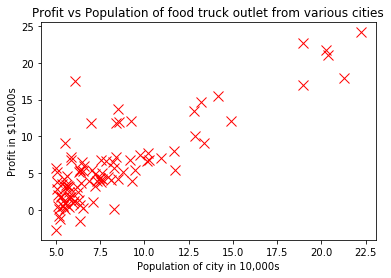

In [28]:

df = pd.read_csv('ex1data1.txt',header=None,names=['x','y']) # read data feattures and output

X = np.array(df.x)
y = np.array(df.y)
    
m= len(y)
y = y.reshape(m,1)
    
plt.plot(X,y,'rx',markersize=10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of city in 10,000s')
plt.title('Profit vs Population of food truck outlet from various cities') 
# plot the data
    

Cost: 32.072733877455676
Theta: [[-3.63029144]
 [ 1.16636235]]


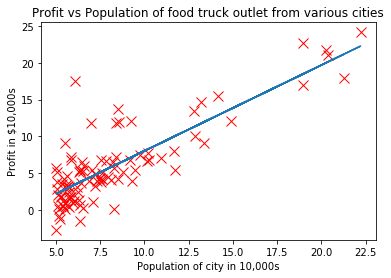

In [29]:
temp = np.ones((m,2))
temp[:,-1] = X
    
X = temp
    
theta = np.zeros((X.ndim,1))
    
iterations = 1500
    
alpha = 0.01
    
print("Cost: {}".format(computecost(X,y,theta))) # Initial Cost
    
J_history,theta = gradientdescent(X, y, theta, alpha, iterations)
    
print("Theta: {}".format(theta)) # Theta to Initialize the J(theta)


plt.plot(X[:,1],y,'rx',markersize=10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of city in 10,000s')
plt.title('Profit vs Population of food truck outlet from various cities') 
plt.plot(X[:,1].reshape(m,1), np.dot(X,theta), '-')
# plot the data with curve fitting model
plt.show()